<h1>Chapter 4 | Data Exercise #2 | <code>wms-management-survey</code> | Comparison and correlation</h1>
<h2>Introduction:</h2>
<p>In this notebook, you will find my notes and code for Chapter 5's <b>exercise 2</b> of the book <a href="https://gabors-data-analysis.com/">Data Analysis for Business, Economics, and Policy</a>, by Gábor Békés and Gábor Kézdi. The question was: 
<p>2. Using the <code>wms-management-survey</code> dataset:</p>
<p>Assignments:</p>
<ul>
    <li>Pick a country different from Mexico.</li>
    <li>Reproduce all figures and tables of our case study.</li>
    <li>Compare your results to what we found for Mexico.</li>
</ul>
<h2><b>1.</b> Load the data</h2>

In [2]:
import os
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
from mizani.formatters import percent_format

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Increase number of returned rows in pandas
pd.set_option("display.max_rows", 500)

In [4]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_data_exercises")[0]

# Get location folders
data_in = f"{dirname}da_data_repo/wms-management-survey/clean/"
data_out = f"{dirname}da_data_exercises/ch04-comparison_correlation/02-wms_management_ex1/data/clean/"
output = f"{dirname}da_data_exercises/ch04-comparison_correlation/02-wms_management_ex1/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [5]:
from py_helper_functions import *

In [6]:
df = pd.read_csv(f"{data_in}wms_da_textbook.csv")

In [7]:
df["country"].unique()

array(['United States', 'India', 'New Zealand', 'Australia', 'Argentina',
       'Brazil', 'Canada', 'Chile', 'China', 'Germany', 'Spain', 'France',
       'Northern Ireland', 'Great Britain', 'Greece',
       'Republic of Ireland', 'Italy', 'Japan', 'Mexico', 'Poland',
       'Portugal', 'Sweden', 'Singapore', 'Turkey'], dtype=object)

In [8]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.6,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.6,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.6,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.4,4.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.4,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>1.1 Sample selection</h3>
<p>Let's pick a country with different proportions than Mexico yet let's apply the same exclusions made by the author, that is, filtering out firms with fewer than 100 employees and more than 5000 employees. We'll use the same year, 2013 - we'll choose <b>Brazil</b>.</p>

In [9]:
df = df.loc[
    lambda x: (x["country"] == "Brazil") &
              (x["wave"] == 2013) &
              (x["emp_firm"] >= 100) &
              (x["emp_firm"] <= 5000)
]

In [10]:
df["emp_firm"].describe()

count     506.000000
mean      682.561265
std       936.190571
min       100.000000
25%       181.000000
50%       343.500000
75%       717.250000
max      5000.000000
Name: emp_firm, dtype: float64

<h2>2. Visualizing the distribution of management score</h2>

In [14]:
df.loc[:, ["management"]].describe()

,management
count,506.000000
mean,2.734848
std,0.588271
min,1.055556
25%,2.333333
50%,2.777778
75%,3.111111
max,4.500000


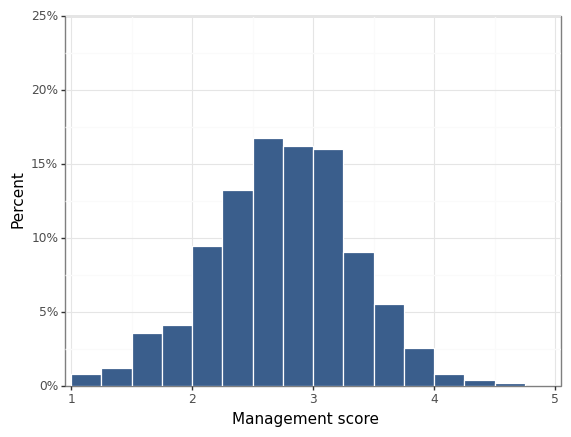

<ggplot: (126977780607)>

In [12]:
ggplot(df, aes(x="management")) + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    fill=color[0],
    color="white",
    binwidth=0.25,
    boundary=0,
    closed="left",
) + labs(x="Management score", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(1, 5)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.25),
    breaks=seq(0, 0.26, by=0.05),
    labels=percent_format()
) + theme_bw()

Some observations about the histogram:
<ul>
<li>The mean is <b>2.73</b>, while the median is <b>2.77</b>. The dataset resembles a normal distribution, with a small degree of skewness to the left.</li>
<li>The standard deviation is <b>0.58</b>.</li>
<li>The mode is in the bin between <b>2.5</b> and <b>2.75</b>.
</ul>
<h2>3. Visualizing the distribution of employment</h2>
<p>We can start by looking at the summary statistics of Brazilian firms by their respective size, which is measured by the number of employees employed by each firm.</li>

In [15]:
df.loc[:, ["emp_firm"]].describe()

,emp_firm
count,506.000000
mean,682.561265
std,936.190571
min,100.000000
25%,181.000000
50%,343.500000
75%,717.250000
max,5000.000000


<p>Observations:</p>
<ul>
<li>The mean is <b>682</b> and the median, <b>343</b>.</li>
<li>The mean is far higher than the median and therefore we can expect a significant degree of <b>skewness</b> to the right.</li>
<li>The standard deviation is <b>936</b>.
</ul>

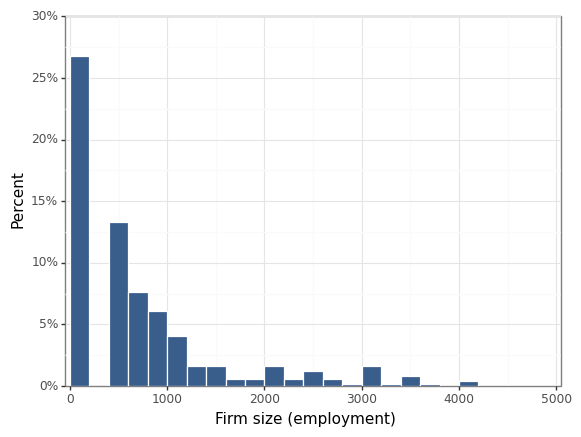

<ggplot: (126980015210)>

In [16]:
ggplot(df, aes(x="emp_firm", y="stat(count)/sum(stat(count))")) + geom_histogram(
    fill=color[0], color="white", binwidth=200, boundary=0, closed="left"
) + labs(x="Firm size (employment)", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 5000), breaks=seq(0, 5001, by=1000)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.3),
    breaks=seq(0, 0.5, by=0.05),
    labels=percent_format(),
) + theme_bw()

The histogram shows a high concentration of smaller firms in Brazil. More specifically, more than 25% of all observations registered firms with less than 200 employees. Interestingly enough, there were no observations in the 200-400 bin.

To make this distribution more symmetric, we can plot a histogram formatted by the lognormal distribution.

In [17]:
df["lnemp_firm"] = np.log(df["emp_firm"])
df["lnemp_firm"].describe()

count    506.000000
mean       5.974693
std        0.965696
min        4.605170
25%        5.198452
50%        5.839186
75%        6.575327
max        8.517193
Name: lnemp_firm, dtype: float64

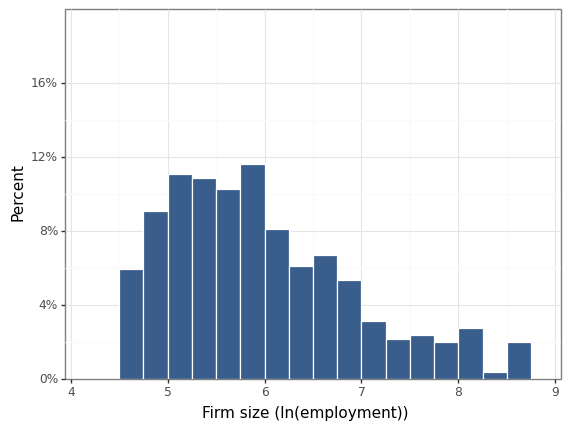

<ggplot: (126979924713)>

In [18]:
ggplot(df, aes(x="lnemp_firm"))  + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    fill=color[0], 
    color="white", 
    binwidth=0.25, 
    boundary=0, 
    closed="left"
) + labs(x="Firm size (ln(employment))", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(4, 9) 
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.2),
    breaks=seq(0, 0.2, by=0.04),
    labels=percent_format(),
) + theme_bw()

<p>We notice that the distribution is not as skewed as before, yet it still presents a longer tail to the right. The distribution, nonetheless, is much more symmetrical. In conclusion, the distribution of employment is skewed; while closer to lognormal than normal, the latter is still not the best approach.</p>
<h2>4. Conditional probabilities | Binning firm size and visualize the quality of specific management practices accordingly</h2>
<p>As a reminder, <b>conditional probability</b> of an event means the probability of an event if another event (the conditioning event) happens. Because both the management score and employment are quantitative variables with many values, they are not adequate for an investigation conditional probabilities.</p>
<p>To overcome this issue, we will create a <b>qualitative</b> variable by creating three bins of employment: <b>small, medium, and large</b>. Let's follow the book's example and bind the bins by three intervals: 100-199, 200-999, and 1000+.


In [19]:
df["emp3bins"] = np.where(df["emp_firm"] < 200, 1, np.nan)
df["emp3bins"] = np.where((df["emp_firm"] >= 200) & (df["emp_firm"] < 1000), 2, df["emp3bins"])
df["emp3bins"] = np.where(df["emp_firm"] >= 1000, 3, df["emp3bins"])

In [20]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205,lnemp_firm,emp3bins
1760,1290,2013,br,Brazil,28.0,3.277778,3.0,3.8,3.0,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.877296,2.0
1763,1292,2013,br,Brazil,33.0,2.555556,2.5,3.2,2.8,1.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.620073,2.0
1765,1293,2013,br,Brazil,33.0,2.666667,3.0,2.8,2.6,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.040255,2.0
1766,1294,2013,br,Brazil,35.0,3.222222,4.0,3.8,2.8,2.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.313220,3.0
1770,1297,2013,br,Brazil,31.0,3.222222,3.0,3.4,3.0,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.605170,1.0


In [21]:
df["emp3bins"].describe()

count    506.000000
mean       1.913043
std        0.657288
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: emp3bins, dtype: float64

<p>By now, we can make a few comparisons with the book case study, which used Mexico as an example. We can tell that Brazil and Mexico display similar statistics regarding firm sizes.</p>
<ul>
<li>The mean for Brazil, <b>1.91</b> is close to that of Mexico, <b>2</b>. We can expect that the average firm in both countries is medium-sized.</li>
<li>The standard deviation is equally similar: <b>0.65</b> for Brazil, <b>0.63</b> for Mexico.</li>
</ul>
<h3>4.1 Plotting stacked charts - Describing patterns of association</h3>
<p>We will use stacked charts to visualize conditional probabilities. Because we have 15 conditional probabilities for each management score (that is, the probability of each of the 5 values of y by each of the three values of x), a stacked bar chart will be of great assistance. Let's create the DataFrames for our job.</p>
<h4>4.1.1 Stacked bar chart | Figure 4.3 (a) Lean management</h4>

In [22]:
df1 = pd.DataFrame(
    df.loc[:, ["emp3bins", "lean1"]].groupby(["emp3bins", "lean1"]).agg("size")
).reset_index()

df1.columns = ["emp3bins", "lean1", "Count"]

group_counts = df1.groupby("emp3bins").agg("sum")["Count"]

df1.loc[df1["emp3bins"] == 1, "Percent"] = round(df1.loc[df1["emp3bins"] == 1, "Count"]/group_counts[1],5)
df1.loc[df1["emp3bins"] == 2, "Percent"] = round(df1.loc[df1["emp3bins"] == 2, "Count"]/group_counts[2],5)
df1.loc[df1["emp3bins"] == 3, "Percent"] = round(df1.loc[df1["emp3bins"] == 3, "Count"]/group_counts[3],5)

df1 = df1.assign(
    lean1=pd.Categorical(
        df1["lean1"], categories=sorted(set(df["lean1"]), reverse=True)
    )
)

In [23]:
df1

,emp3bins,lean1,Count,Percent
0,1.0,1.0,27,0.20301
1,1.0,2.0,59,0.44361
2,1.0,3.0,37,0.27820
3,1.0,4.0,9,0.06767
4,1.0,5.0,1,0.00752
5,2.0,1.0,29,0.10211
6,2.0,2.0,108,0.38028
7,2.0,3.0,103,0.36268
8,2.0,4.0,34,0.11972
9,2.0,5.0,10,0.03521


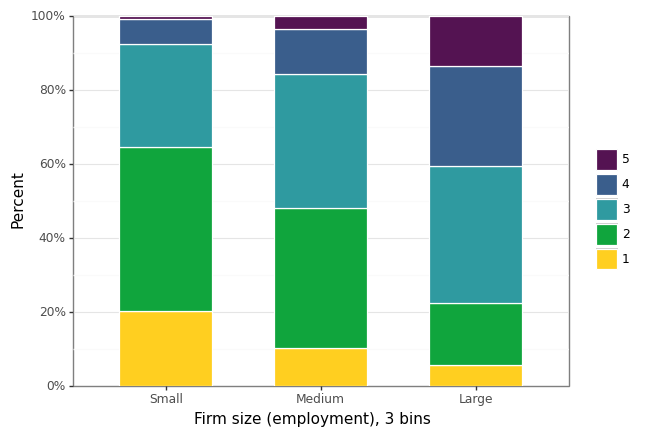

<ggplot: (126979905200)>

In [24]:
ggplot(df1, aes(x="emp3bins", y="Percent", fill="lean1")) + geom_bar(
    stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
) + scale_y_continuous( 
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Firm size (employment), 3 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_fill_manual(
    values=(color[2], color[0], color[4], color[1], color[3]), name=" "
) + scale_x_discrete(limits=[1, 2, 3],
                     labels=["Small", "Medium", "Large"])